# Amazon Fine Food Reviews Analysis¶ 

Data Source: **https://www.kaggle.com/snap/amazon-fine-food-reviews**

**The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.**

Number of reviews: 568,454

Number of users: 256,059

Number of products: 74,258

Timespan: Oct 1999 - Oct 2012

Number of Attributes/Columns in data: 10

Attribute Information:

Id
ProductId - unique identifier for the product

UserId - unqiue identifier for the user

ProfileName

HelpfulnessNumerator - number of users who found the review helpful

HelpfulnessDenominator - number of users who indicated whether they found the 
review helpful or not

Score - rating between 1 and 5

Time - timestamp for the review

Summary - brief summary of the review


Text - text of the review

Objective:- Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).


**[Q] How to determine if a review is positive or negative?** 

[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

**[1.1] Loading the data **

**The dataset is available in two forms**

.csv file

SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. 

If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [2]:
#read data
con=sqlite3.connect('/content/drive/MyDrive/amazon data/database.sqlite')

In [3]:
#neglect data where review score=3
filtered_data=pd.read_sql_query(''' SELECT * FROM Reviews WHERE Score!=3''',con)
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
def partition(x):
  if x<3:
    return 'negetive'
  return 'positive'
  

In [5]:
filtered_data['Score']=filtered_data['Score'].map(partition)

In [6]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negetive,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negetive,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
filtered_data['Score'].value_counts()

positive    443777
negetive     82037
Name: Score, dtype: int64

In [8]:
display=pd.read_sql_query('''SELECT * FROM Reviews WHERE Score!=3
                             AND UserId="AR5J8UI46CURR"
                             ORDER BY ProductID''',con)

In [9]:
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


*Observations: *

1) As in above table, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator.Score,Time, Summary and Text shows same content

2) Also for all 5 product, shows same time.

3) Here we observed that, product is same, only the flavour is different

4) so we will remove this duplication and keep any one product which all these features so we removing duplicates.

In [10]:
#sort data according to product Id in ascending order
sorted_data=filtered_data.sort_values('ProductId',ascending=True,inplace=False,kind='quicksort',na_position='last')

In [11]:
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)

In [12]:
# % of data still remains after removing duplicates
((final['Id'].size)/(filtered_data['Id'].size))*100

69.25890143662969

In [13]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [14]:
final.shape

(364171, 10)

## **Now, we do preprocessing like removal of stop words, html tags and make all letters in lowercase.**

In [15]:
import re
i=0
for sent in final['Text'].values:
  if (re.findall('<.*?>',sent)):
    print(i)
    print(sent)
    break
  i+=1

6
I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. Since then, we've read it perpetually and he loves it.<br /><br />First, this book taught him the months of the year.<br /><br />Second, it's a pleasure to read. Well suited to 1.5 y/o old to 4+.<br /><br />Very few children's books are worth owning. Most should be borrowed from the library. This book, however, deserves a permanent spot on your shelf. Sendak's best.


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import  WordNetLemmatizer

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop=set(stopwords.words('english'))
sno=nltk.stem.SnowballStemmer('english')

In [19]:
#function to clean htmal tags
def cleanhtml(sentence):
  cleanr=re.compile('<.*?>')
  cleanedtext=re.sub(cleanr,'',sentence)
  return cleanedtext

#function to clean punctuations
def cleanpunc(sentence):
  cleaned=re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned=re.sub(r'[.|,|(|)|\|/]',r'',sentence)
  return cleaned

In [20]:
print(stop)
print(sno.stem('tasty'))

{"she's", "couldn't", "mightn't", 'some', 'nor', 'doing', 'now', 'their', "didn't", 'ma', 'i', 'before', 'shouldn', "wouldn't", 'the', 'at', 'myself', 'm', 'you', 'further', 'its', 'all', 'just', 'had', 'been', 'for', 'from', 'over', 'these', 's', 'don', 'o', 'to', 'did', 'again', "it's", 'themselves', 'between', 'll', "weren't", 'hers', 'there', 'through', 'when', 'they', "shan't", 'if', 'hasn', 'who', 'do', 've', "hadn't", 'needn', 'down', 'by', 'herself', 'after', 'below', "should've", 'most', 'while', 'off', "you'd", 'your', 'those', 'into', 'we', "mustn't", 'so', 'once', 'mightn', 'himself', 'aren', "isn't", 'd', 'each', 'what', "that'll", 'of', 'couldn', "haven't", 'be', "needn't", 'was', "you'll", 'until', 'such', 't', 'has', 'my', 'as', "you've", 'yours', 'both', 'then', 'didn', 'same', 'that', 'will', 're', 'have', 'on', 'were', 'ours', 'her', 'he', 'weren', 'why', 'not', 'isn', 'itself', 'theirs', 'above', 'ain', 'where', "you're", 'them', "don't", 'up', 'or', 'haven', 'durin

In [21]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.

i=0
final_string=[]
all_positive_words=[]
all_negetive_words=[]
str1=''
s=''
for sent in final['Text'].values:
  filtered_string=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if ((cleanword.isalpha()) & (len(cleanword)>2)):
        if (cleanword.islower() not in stop):
          s=(sno.stem(cleanword.lower()))
          filtered_string.append(s)
        if (final['Score'].values)[i]=='positive':
          all_positive_words.append(s)
        if (final['Score'].values)[i]=='negetive':
          all_negetive_words.append(s)
        else:
          continue
      else:
        continue
  str1= ' '.join(filtered_string)
  final_string.append(str1)
  i+=1

In [22]:
final['CleanText']=final_string

In [23]:
final.shape

(364171, 11)

In [24]:
final['Time']=pd.to_datetime(final['Time'],unit='s')
final=final.sort_values('Time',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')


In [25]:
final_p=final[final['Score']=='positive'].sample(n=5000)
final_n=final[final['Score']=='negetive'].sample(n=5000)
final=pd.concat([final_p,final_n])

In [26]:
! pip install scikit-plot

In [27]:
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score,hamming_loss,roc_auc_score

In [30]:
X=final['CleanText']
y=final['Score']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
X_tr,X_cv,y_tr,y_cv=train_test_split(X_train,y_train,test_size=0.33,random_state=0)

In [36]:

print('X_train, Y_train', X_train.shape, y_train.shape)
print('X_test, Y_test', X_test.shape, y_test.shape)
print('X_tr, Y_tr', X_tr.shape, y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, y_cv.shape)

X_train, Y_train (6700,) (6700,)
X_test, Y_test (3300,) (3300,)
X_tr, Y_tr (4489,) (4489,)
X_cv, Y_cv (2211,) (2211,)


In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score
from sklearn.metrics import roc_auc_score

## **Training Model**

In [98]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
#Decision tree

def DT_classifier(X_train,X_cv,y_train,y_cv):

  pred_cv=[]
  pred_train=[]

  depth=[1,5,10,50,100,500,1000]
  sample_split=[5,10,100,500]

  for i in depth:
    for j in sample_split:

      clf=DecisionTreeClassifier(max_depth=i,min_samples_split=j)
      clf.fit(X_train,y_train)
      probs=clf.predict_proba(X_cv)[:,1]
      prob=clf.predict_proba(X_train)[:,1]
      auc_score_cv=roc_auc_score(y_cv,probs)
      auc_score_train=roc_auc_score(y_train,prob)
      pred_cv.append(auc_score_cv)
      pred_train.append(auc_score_train)

  cmap=sns.light_palette('green')

  #representing heatmap for auc score
  print('AUC score on train dta','_'*30)
  pred_train=np.array(pred_train)
  pred_train=pred_train.reshape(len(depth),len(sample_split))
  plt.figure(figsize=(10,5))
  sns.heatmap(pred_train,annot=True,cmap=cmap,fmt='.3f',xticklabels=sample_split,yticklabels=depth)
  plt.xlabel('sample split')
  plt.ylabel('depth')
  plt.show()
  print('AUC score on cv dta','_'*30)
  pred_cv=np.array(pred_cv)
  pred_cv=pred_cv.reshape(len(depth),len(sample_split))
  plt.figure(figsize=(10,5))
  sns.heatmap(pred_cv,annot=True,fmt='.3f',xticklabels=sample_split,yticklabels=depth)
  plt.xlabel('sample split')
  plt.ylabel('depth')
  plt.show()


In [78]:
import scikitplot.metrics as skplt
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
def testing(X_train,X_test,y_train,y_test,optimal_depth,optimal_split):
  clf=DecisionTreeClassifier(max_depth=optimal_depth,min_samples_split=optimal_split)
  clf.fit(X_train,y_train)
  probs=clf.predict_proba(X_test)[:,1]#probabilites of positive outcomes only
  prob=clf.predict_proba(X_train)[:,1]
  print('Auc score for test data',roc_auc_score(y_test,probs))
  print('Auc score for train data',roc_auc_score(y_train,prob))

  #calculate roc curve
  fpr,tpr,thresholds=roc_curve(y_test,probs,pos_label='positive')
  fpr1,tpr1,thresholds1=roc_curve(y_train,prob,pos_label='positive')

  #plot no skill

  plt.plot([0,1],[0,1],linestyle='--')
  
  #plot roc curve for model
  plt.plot(fpr,tpr,marker='.',color='b',label='test data')
  plt.plot(fpr1,tpr1,marker='.',color='r',label='train data')
  plt.title('Line plot for roc curve on train and test data')
  plt.legend(loc='best')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.show()
  #plot confusion matrix

  pred=clf.predict(X_test)
  pred1=clf.predict(X_train)
  skplt.plot_confusion_matrix(y_test,pred,title='confusion matrix on test data')
  skplt.plot_confusion_matrix(y_train,pred1,title='confusion matrix on train data')

  print('hamming loss for test data',metrics.hamming_loss(y_test,pred))
  print('hamming loss for train data',metrics.hamming_loss(y_train,pred1))
  print('precision and recall on test data',metrics.classification_report(y_test,pred))
  print('precision and recall on train data',metrics.classification_report(y_train,pred1))

## **Top 10 features**

In [44]:
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

def imp_feature(vectorizer,classifier, n =20):
    feature_names = vectorizer.get_feature_names()
    coefs = sorted(zip(classifier.feature_importances_, feature_names))
    top = coefs[:-(n + 1):-1]
    print('\033[1m' + "feature_importances\tfeatures" + '\033[0m')
    print("="*35)
    for (coef1, feat1) in top:
        print("%.4f\t\t\t%-15s" % (coef1, feat1))


# **Techniques for vectorization :**
## Bag of Words (BoW)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
bow_train=count_vec.fit_transform(X_tr)
print('type pf count vectorizer',type(bow_train))
print('shape out of bow vectorizer',bow_train.get_shape())
bow_cv=count_vec.transform(X_cv)
bow_test=count_vec.transform(X_test)
print("CV Data Size: ",bow_cv.shape)
print("Test Data Size: ",bow_test.shape)


type pf count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
shape out of bow vectorizer (4489, 11859)
CV Data Size:  (2211, 11859)
Test Data Size:  (3300, 11859)


In [67]:
#normalize data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False,)
bow_train=sc.fit_transform(bow_train)
bow_cv= sc.transform(bow_cv)
bow_test=sc.transform(bow_test)

AUC score on train dta ______________________________


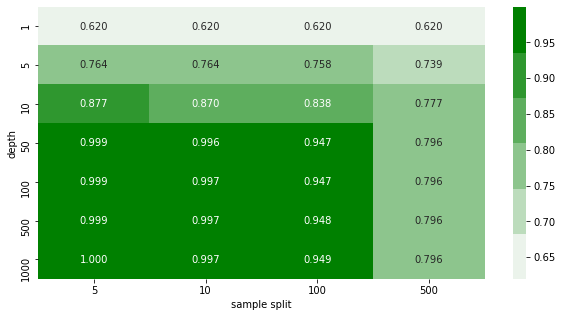

AUC score on cv dta ______________________________


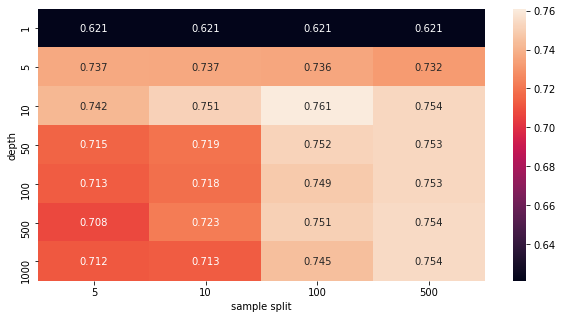

In [99]:
#find optimal depth and optimal split
DT_classifier(bow_train,bow_cv,y_tr,y_cv)

# **Testing on Test data (BOW)**

Auc score for test data 0.7626829647255358
Auc score for train data 0.8387196364031998


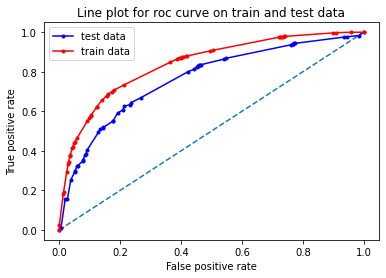

hamming loss for test data 0.2960606060606061
hamming loss for train data 0.23546446870126977
precision and recall on test data               precision    recall  f1-score   support

    negetive       0.68      0.76      0.72      1643
    positive       0.73      0.64      0.69      1657

    accuracy                           0.70      3300
   macro avg       0.71      0.70      0.70      3300
weighted avg       0.71      0.70      0.70      3300

precision and recall on train data               precision    recall  f1-score   support

    negetive       0.74      0.82      0.78      2276
    positive       0.79      0.71      0.75      2213

    accuracy                           0.76      4489
   macro avg       0.77      0.76      0.76      4489
weighted avg       0.77      0.76      0.76      4489



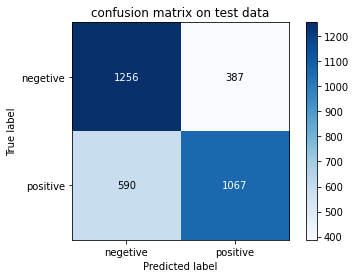

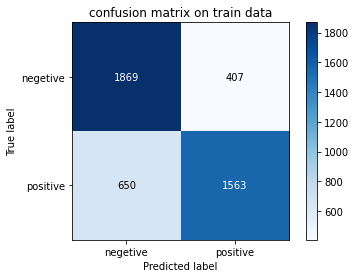

In [79]:
testing(bow_train,bow_test,y_tr,y_test,optimal_depth=10,optimal_split=100)

# **Feature Importance (BOW)**

In [82]:

clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100)
clf.fit(bow_train,y_tr)
imp_feature(count_vec,clf)

feature_importances	features
0.1762			not            
0.1047			great          
0.0913			disappoint     
0.0749			love           
0.0609			best           
0.0365			delici         
0.0243			perfect        
0.0240			good           
0.0222			excel          
0.0196			favorit        
0.0190			tast           
0.0153			use            
0.0151			thought        
0.0146			was            
0.0139			but            
0.0124			feel           
0.0124			too            
0.0120			and            
0.0109			bad            
0.0103			sweet          



# Visualize decision tree with Graphviz on BoW

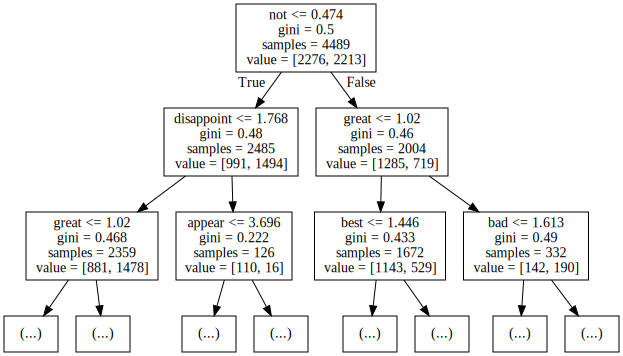

In [83]:
from sklearn import tree
import graphviz
from graphviz import Source
feat=count_vec.get_feature_names()
Source(tree.export_graphviz(clf,out_file=None,feature_names=feat,max_depth=2))

# **TF-IDF**

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec=TfidfVectorizer(ngram_range=(1,2))
tfidf_train=tfidf_vec.fit_transform(X_tr)
tfidf_cv=tfidf_vec.transform(X_cv)
tfidf_test=tfidf_vec.transform(X_test)

In [89]:
print('the type of count vectorizer',type(tfidf_train))
print('shape of tfidf vectorizer',tfidf_train.get_shape())
print('CV data shape',tfidf_cv.shape)
print('test data shape',tfidf_test.shape)

the type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
shape of tfidf vectorizer (4489, 137360)
CV data shape (2211, 137360)
test data shape (3300, 137360)


In [90]:
tfidf_train=sc.fit_transform(tfidf_train)
tfidf_cv=sc.transform(tfidf_cv)
tfidf_test=sc.transform(tfidf_test)

AUC score on train dta ______________________________


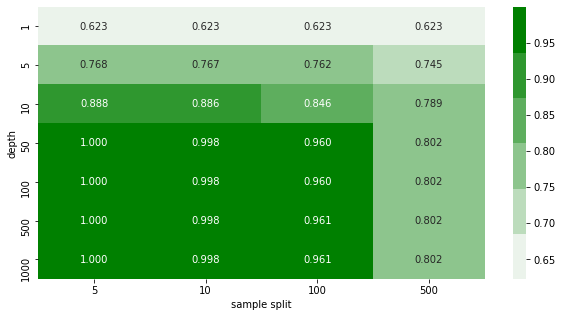

AUC score on cv dta ______________________________


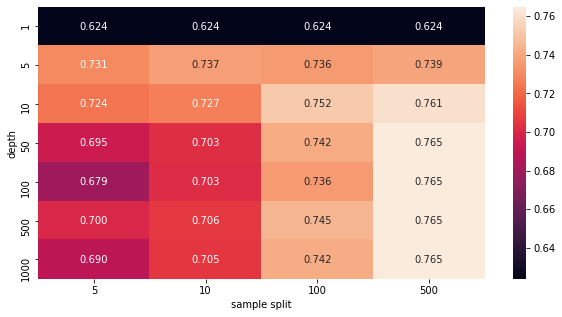

In [100]:
# find optimal depth and optimal split
DT_classifier(tfidf_train,tfidf_cv,y_tr,y_cv)

Auc score for test data 0.7770284938094387
Auc score for train data 0.8019954383627026


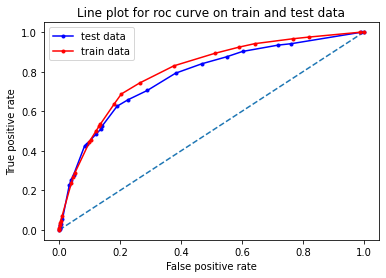

hamming loss for test data 0.28393939393939394
hamming loss for train data 0.257295611494765
precision and recall on test data               precision    recall  f1-score   support

    negetive       0.69      0.77      0.73      1643
    positive       0.75      0.66      0.70      1657

    accuracy                           0.72      3300
   macro avg       0.72      0.72      0.72      3300
weighted avg       0.72      0.72      0.72      3300

precision and recall on train data               precision    recall  f1-score   support

    negetive       0.72      0.80      0.76      2276
    positive       0.77      0.69      0.72      2213

    accuracy                           0.74      4489
   macro avg       0.75      0.74      0.74      4489
weighted avg       0.74      0.74      0.74      4489



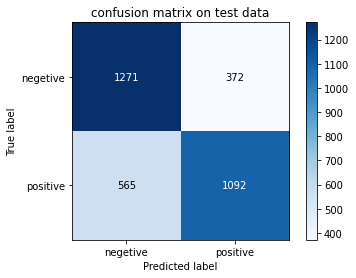

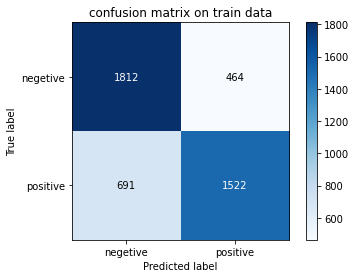

In [101]:
testing(tfidf_train,tfidf_test,y_tr,y_test,optimal_depth=50,optimal_split=500)

In [103]:

clf = DecisionTreeClassifier(max_depth =50 , min_samples_split =500 )
clf.fit(tfidf_train,y_tr)
imp_feature(tfidf_vec,clf)

feature_importances	features
0.2383			not            
0.1436			great          
0.0999			love           
0.0981			disappoint     
0.0688			perfect        
0.0406			the best       
0.0343			good           
0.0320			best           
0.0289			favorit        
0.0279			delici         
0.0275			tast           
0.0258			was            
0.0229			use            
0.0215			good and       
0.0173			excel          
0.0159			wonder         
0.0155			find           
0.0155			easi           
0.0137			satisfi        
0.0119			read           


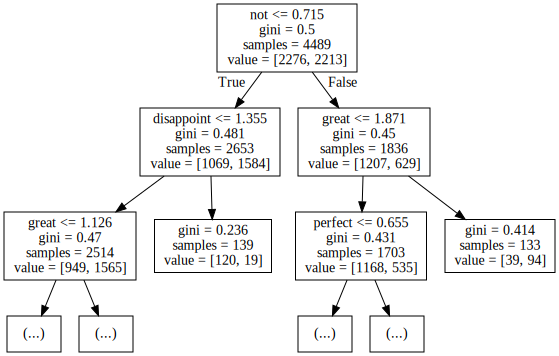

In [104]:
from sklearn import tree
import graphviz
from graphviz import Source
feat=tfidf_vec.get_feature_names()
Source(tree.export_graphviz(clf,out_file=None,feature_names=feat,max_depth=2))

# **AVG W2V**

In [107]:
i=0
list_of_train_sent=[]

for sent in X_tr.values:
  filtered_sentence=[]

  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if(cleanword.isalpha()):
        filtered_sentence.append(cleanword.lower())
      else:
        continue
  list_of_train_sent.append(filtered_sentence)

In [109]:
i=0
list_of_cv_sent=[]

for sent in X_cv.values:
  filtered_sentence=[]

  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if(cleanword.isalpha()):
        filtered_sentence.append(cleanword.lower())
      else:
        continue
  list_of_cv_sent.append(filtered_sentence)

In [110]:
i=0
list_of_test_sent=[]

for sent in X_test.values:
  filtered_sentence=[]

  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if(cleanword.isalpha()):
        filtered_sentence.append(cleanword.lower())
      else:
        continue
  list_of_test_sent.append(filtered_sentence)

In [148]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_train_sent,min_count=5,size=50,workers=4)
w2v_words=list(w2v_model.wv.vocab)

In [152]:
def avg_w2v(list_of_sent):
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in list_of_sent: # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)        
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [154]:
train_avgw2v = avg_w2v(list_of_train_sent)

4489
50


In [155]:

cv_avgw2v = avg_w2v(list_of_cv_sent)

2211
50


In [156]:
test_avgw2v = avg_w2v(list_of_test_sent)

3300
50


In [159]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_avgw2v=sc.fit_transform(train_avgw2v)
cv_avgw2v=sc.transform(cv_avgw2v)
test_avgw2v=sc.transform(test_avgw2v)

AUC score on train dta ______________________________


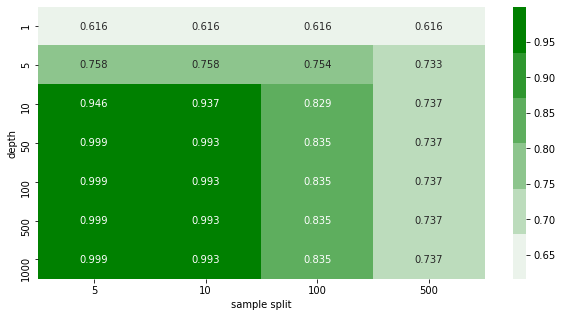

AUC score on cv dta ______________________________


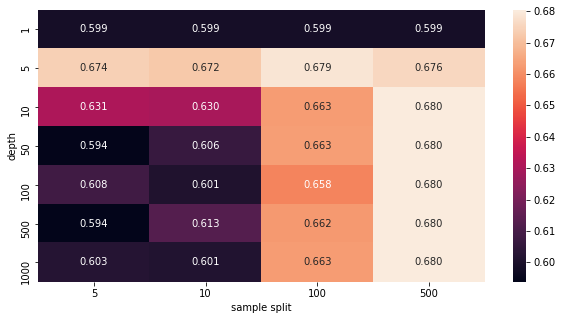

In [160]:
DT_classifier(train_avgw2v,cv_avgw2v,y_tr,y_cv)

Auc score for test data 0.7014186848541994
Auc score for train data 0.7367839384941356


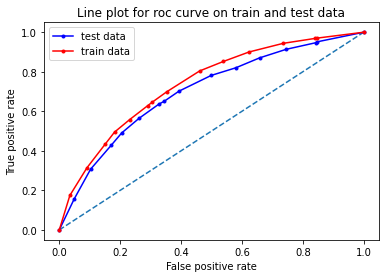

hamming loss for test data 0.34545454545454546
hamming loss for train data 0.32746714190242815
precision and recall on test data               precision    recall  f1-score   support

    negetive       0.67      0.61      0.64      1643
    positive       0.64      0.70      0.67      1657

    accuracy                           0.65      3300
   macro avg       0.66      0.65      0.65      3300
weighted avg       0.66      0.65      0.65      3300

precision and recall on train data               precision    recall  f1-score   support

    negetive       0.69      0.65      0.67      2276
    positive       0.66      0.70      0.68      2213

    accuracy                           0.67      4489
   macro avg       0.67      0.67      0.67      4489
weighted avg       0.67      0.67      0.67      4489



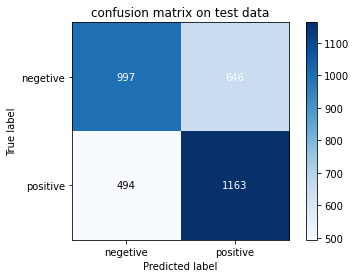

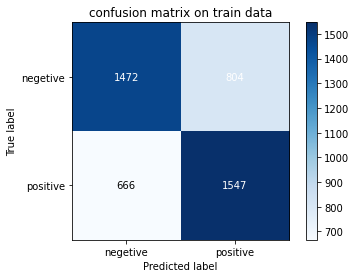

In [161]:
testing(train_avgw2v,test_avgw2v,y_tr,y_test,optimal_depth=10,optimal_split=500)

## **TF-Idf W2v**

In [162]:
#converting  a dictionary  word as key and idf as value
dictionary=dict(zip(tfidf_vec.get_feature_names(),list(tfidf_vec.idf_)))

In [164]:
def tfidfw2v(list_of_sent):
  tfidf_feat=tfidf_vec.get_feature_names()
  tfidf_sent_vectors=[]
  row=0
  for sent in list_of_sent:
    sent_vec=np.zeros(50)
    weight_sum=0
    for word in sent:
      if word in w2v_words and word in tfidf_feat:
        vec=w2v_model.wv[word]
        tf_idf=dictionary[word]*(sent.count(word)/len(sent))
        sent_vec+=tf_idf*vec
        weight_sum+=tf_idf
    
    if weight_sum!=0:
      sent_vec /=weight_sum
    tfidf_sent_vectors.append(sent_vec)
  row+=1
  print(len(tfidf_sent_vectors))
  print(len(tfidf_sent_vectors[0]))
  return np.array(tfidf_sent_vectors)





In [165]:
train_tfidf=tfidfw2v(list_of_train_sent)

4489
50


In [166]:
cv_tfidf=tfidfw2v(list_of_cv_sent)

2211
50


In [167]:
test_tfidf=tfidfw2v(list_of_test_sent)

3300
50


AUC score on train dta ______________________________


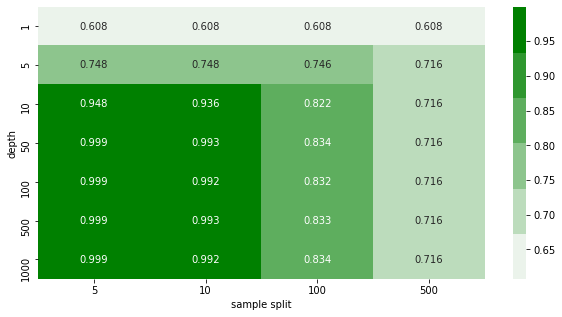

AUC score on cv dta ______________________________


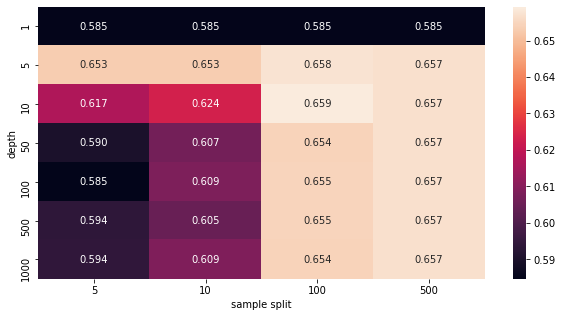

In [168]:
DT_classifier(train_tfidf,cv_tfidf,y_tr,y_cv)

Auc score for test data 0.6626973267838429
Auc score for train data 0.7164793316693099


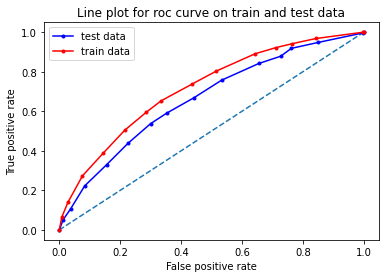

hamming loss for test data 0.3812121212121212
hamming loss for train data 0.3406103809311651
precision and recall on test data               precision    recall  f1-score   support

    negetive       0.61      0.65      0.63      1643
    positive       0.63      0.59      0.61      1657

    accuracy                           0.62      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.62      0.62      0.62      3300

precision and recall on train data               precision    recall  f1-score   support

    negetive       0.66      0.67      0.66      2276
    positive       0.66      0.65      0.65      2213

    accuracy                           0.66      4489
   macro avg       0.66      0.66      0.66      4489
weighted avg       0.66      0.66      0.66      4489



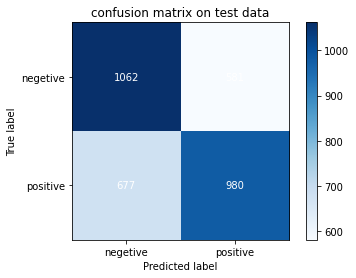

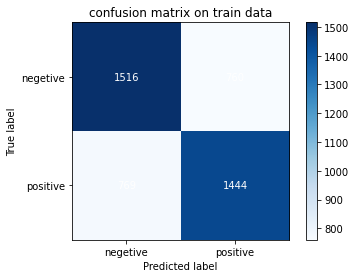

In [169]:
testing(train_tfidf,test_tfidf,y_tr,y_test,optimal_depth=5,optimal_split=500)

In [172]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['vectorizer','Hyperparameter(Depth)','Hyperparameter(min_split)','Test Auc score']
x.add_row(['Bow',10,100,76.26])
x.add_row(['TFIDF',50,500,77.70])
x.add_row(['AVGW2v',10,50,70.14])
x.add_row(['tfidfavgw2v',5,500,66.26])
print('******Final Conclusions*******')
print(x)

******Final Conclusions*******
+-------------+-----------------------+---------------------------+----------------+
|  vectorizer | Hyperparameter(Depth) | Hyperparameter(min_split) | Test Auc score |
+-------------+-----------------------+---------------------------+----------------+
|     Bow     |           10          |            100            |     76.26      |
|    TFIDF    |           50          |            500            |      77.7      |
|    AVGW2v   |           10          |             50            |     70.14      |
| tfidfavgw2v |           5           |            500            |     66.26      |
+-------------+-----------------------+---------------------------+----------------+
